# Exploratory Data Analysis

In [24]:
!pip install -U seaborn

     |████████████████████████████████| 293 kB 3.6 MB/s eta 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.1
    Uninstalling seaborn-0.10.1:
      Successfully uninstalled seaborn-0.10.1


In [1]:
# Imports 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Get the data
df1 = pd.read_csv("olddata/firstbatch_500Samples.csv")
df2 = pd.read_csv("olddata/secondbatch_500Samples.csv")
df=pd.concat([df1,df2])

In [3]:
df.head()

,Unnamed: 0,Snelheid,Omvang1,Positie1,Omvang2,Positie2,Relatie,Speed
0,0,0.0,0.0,-15.0,15.0,-75.0,15.0,1.012087
1,1,0.0,0.0,15.0,30.0,30.0,-90.0,0.844846
2,2,0.0,0.0,15.0,60.0,-30.0,-90.0,2.491373
3,3,0.0,0.0,45.0,60.0,75.0,60.0,1.249660
4,4,0.0,0.0,75.0,30.0,-75.0,-90.0,1.112912


In [4]:
data=df.drop(columns=['Unnamed: 0'])

In [5]:
data.head()

,Snelheid,Omvang1,Positie1,Omvang2,Positie2,Relatie,Speed
0,0.0,0.0,-15.0,15.0,-75.0,15.0,1.012087
1,0.0,0.0,15.0,30.0,30.0,-90.0,0.844846
2,0.0,0.0,15.0,60.0,-30.0,-90.0,2.491373
3,0.0,0.0,45.0,60.0,75.0,60.0,1.249660
4,0.0,0.0,75.0,30.0,-75.0,-90.0,1.112912


In [6]:
summary_stats = data.describe()
summary_stats_df = pd.DataFrame(summary_stats)
summary_stats_df


,Snelheid,Omvang1,Positie1,Omvang2,Positie2,Relatie,Speed
count,998.000000,998.000000,998.000000,998.00000,998.00000,998.000000,998.000000
mean,4.505010,37.545090,-7.620240,37.45491,-7.43988,-7.650301,3.152739
std,2.874066,25.597875,51.808062,25.60669,51.79074,51.790556,1.595731
min,0.000000,0.000000,-90.000000,0.00000,-90.00000,-90.000000,0.253396
25%,2.000000,15.000000,-56.250000,15.00000,-45.00000,-56.250000,1.897910
50%,5.000000,45.000000,-15.000000,30.00000,0.00000,-15.000000,2.917292
75%,7.000000,60.000000,30.000000,60.00000,41.25000,30.000000,4.261793
max,9.000000,75.000000,75.000000,75.00000,75.00000,75.000000,8.408892


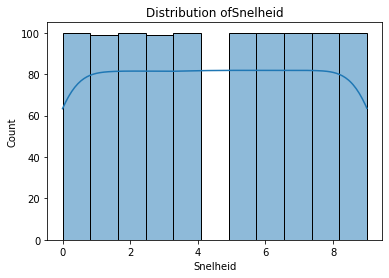

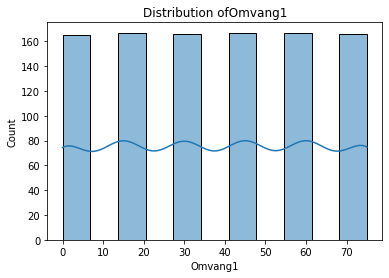

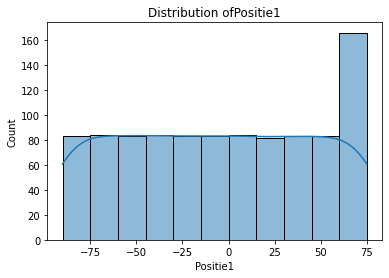

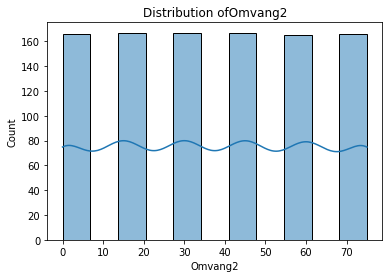

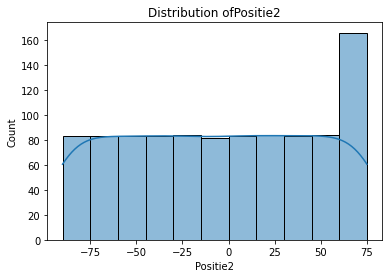

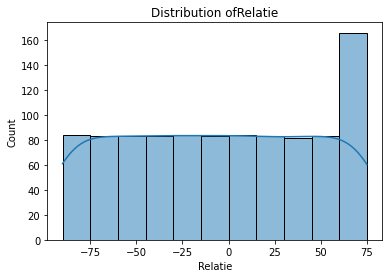

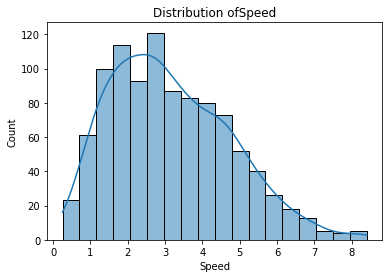

In [10]:
# Plotting individual variables
for col in data.columns:
    sns.histplot(data[col], kde=True)
    plt.title('Distribution of' + col)
    plt.show()

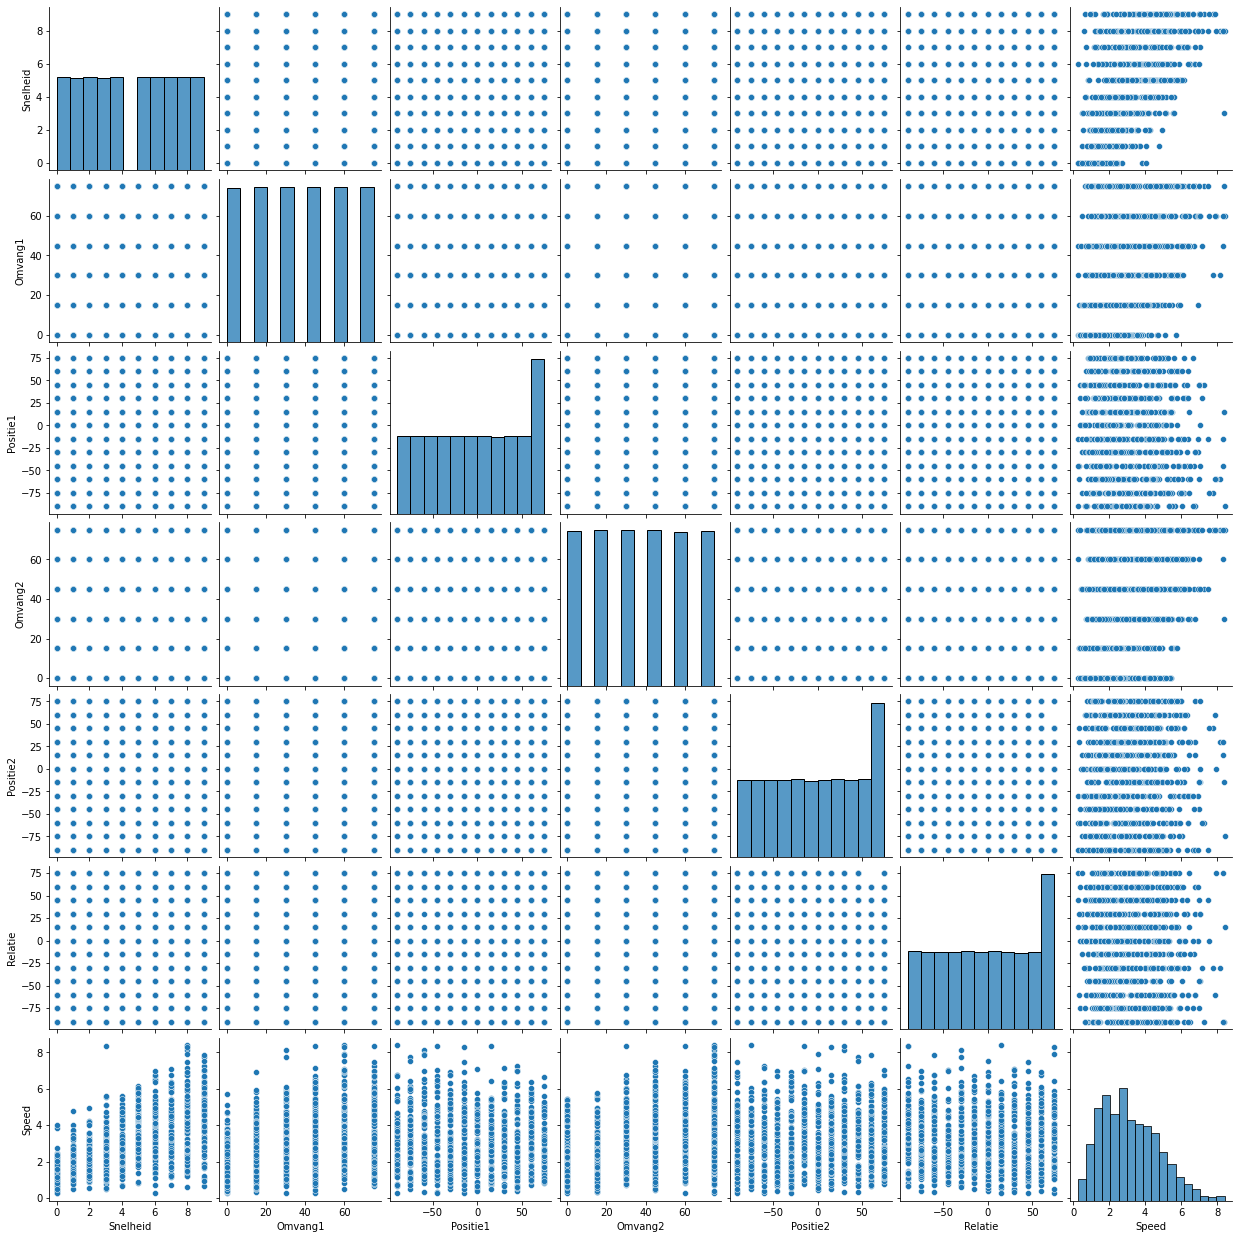

In [11]:
# Pairwise relationships and correlations
sns.pairplot(data)
plt.show()

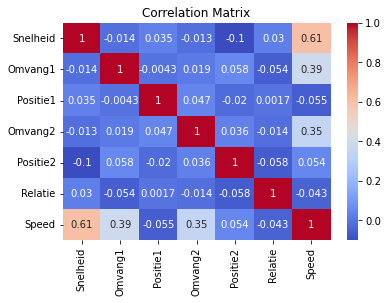

In [12]:
# Correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

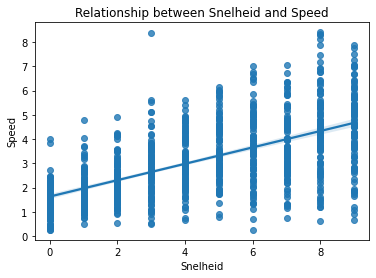

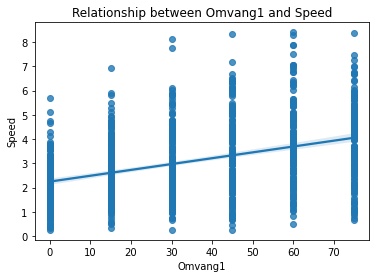

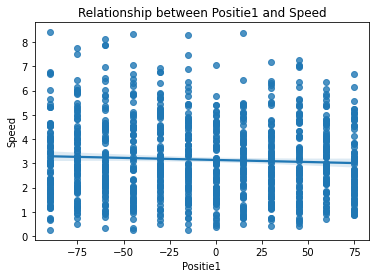

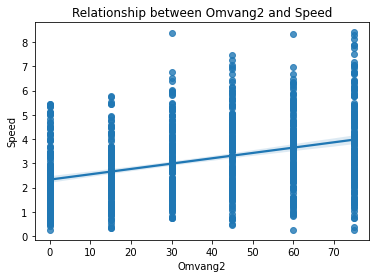

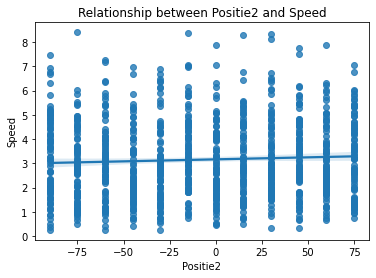

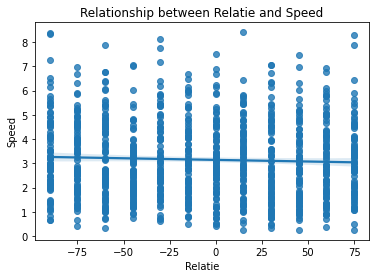

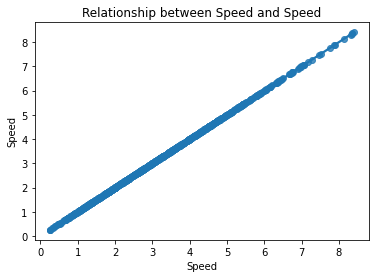

In [14]:
# Plotting relationship between variables and Speed
for col in data.columns:
    sns.regplot(x=col, y='Speed', data=data)
    plt.title('Relationship between ' + col + ' and Speed')
    plt.show()